In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


## Neuran Without Activations

Text(0.5, 1.0, 'Prediction in Tensor Flow')

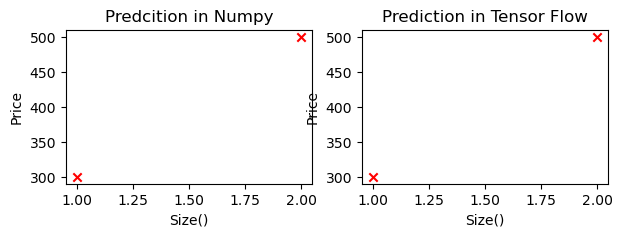

In [63]:
X_train = np.array([[1.0],[2.0]])
y_train = np.array([[300],[500]])
fig , ax = plt.subplots(1,2 ,figsize =(7,2))
ax[0].scatter(X_train, y_train, marker='x', c='r', label="Data Points")
ax[1].scatter(X_train, y_train, marker='x', c='r', label="Data Points")

ax[0].set_xlabel("Size()")
ax[1].set_xlabel("Size()")
ax[0].set_ylabel("Price")
ax[1].set_ylabel("Price")
ax[0].set_title("Predcition in Numpy")
ax[1].set_title("Prediction in Tensor Flow")

In [64]:
linear_layer = tf.keras.layers.Dense(units = 1 , activation = 'linear')

In [67]:
linear_layer.get_weights()

[]

In [69]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.08582234]], shape=(1, 1), dtype=float32)


In [71]:
w,b =linear_layer.get_weights()
print(f'w = {w} , b = {b}')

w = [[0.08582234]] , b = [0.]


In [73]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w ,set_b ])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [75]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
## Now comparison

alin = np.dot(X_train[0].reshape(1,1),set_w) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [77]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

Text(0, 0.5, 'Price(in 1000 dollars)')

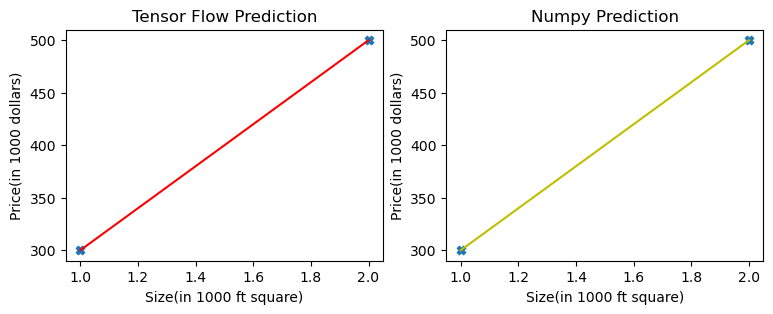

In [79]:
fig , ax = plt.subplots(1 ,2, figsize = (9,3))
ax[0].set_title("Tensor Flow Prediction")
ax[0].scatter(X_train,y_train , marker = "X")
ax[0].plot(X_train , prediction_tf , c = 'r' )
ax[0].set_xlabel("Size(in 1000 ft square)" )
ax[0].set_ylabel('Price(in 1000 dollars)')
#plt.plot(prediction_np)
ax[1].set_title("Numpy Prediction")
ax[1].scatter(X_train,y_train , marker = "X")
ax[1].plot(X_train , prediction_tf , c = 'y' )
ax[1].set_xlabel("Size(in 1000 ft square)" )
ax[1].set_ylabel('Price(in 1000 dollars)')

### Neurans with Sigmoid Activation

In [82]:
X_train = np.array([[0],[1],[2],[3],[4],[5]])
y_train = np.array([[0],[0],[0],[1],[1],[1]])


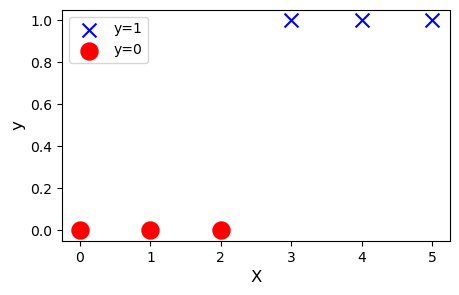

In [84]:
pos = y_train == 1
neg = y_train == 0
fig , ax = plt.subplots(1,1, figsize = (5,3))
ax.scatter(X_train[pos] , y_train[pos] , c = 'b' , marker = 'x' , s = 100 ,label = 'y=1')
ax.scatter(X_train[neg] ,y_train[neg], c = 'r'  , marker  = 'o' , s = 150 , label = 'y=0')
ax.set_ylabel('y' , fontsize = 12)
ax.set_xlabel('X' , fontsize = 12)
ax.legend()


In [86]:
model = Sequential ([
               tf.keras.layers.Dense( 1 , input_dim = 1 , activation = 'sigmoid' , name = 'L1' )
])

In [88]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.24470532]] [0.]
(1, 1) (1,)


In [92]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [94]:
X_test = np.array([3])

In [96]:
def sigmoidnp(z):
    return 1 / (1+np.exp(-z))
     
a1 = model.predict(X_test[0].reshape(1,1))
print(f'{a1[0][0] : 0.2f}')
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(f"{alog[0][0] : 0.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
 0.82
 0.01


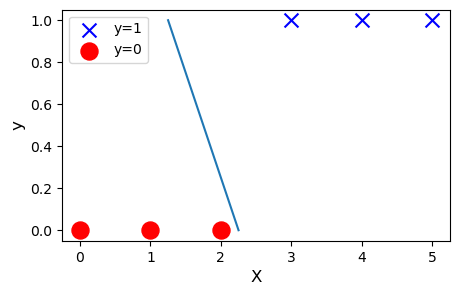

In [98]:
x1 = np.arange(0,2)
x0 = (4.5/2) -x1
fig , ax = plt.subplots(1,1, figsize = (5,3))
ax.scatter(X_train[pos] , y_train[pos] , c = 'b' , marker = 'x' , s = 100 ,label = 'y=1')
ax.scatter(X_train[neg] ,y_train[neg], c = 'r'  , marker  = 'o' , s = 150 , label = 'y=0')
ax.plot(x0,x1)
ax.set_ylabel('y' , fontsize = 12)
ax.set_xlabel('X' , fontsize = 12)
ax.legend()

#### We have Data Set of 40 Data Points, which we split for X_train , y_train is 80% and for X_test,y_test is 20%  

In [101]:
X = np.array([
    [1.16], [2.23], [3.01], [4.45], [5.67], [6.89], [7.34], [8.56], [9.78], [10.50],  # y = 0
    [10.75], [11.23], [12.89], [13.56], [14.67], [15.32], [16.11], [17.45], [18.22], [19.89],  # y = 1
    [2.35], [4.78], [3.65], [9.12], [6.25], [8.34], [5.47], [7.89], [1.56], [10.01],  # y = 0
    [11.45], [15.23], [13.56], [19.78], [18.34], [17.11], [16.45], [14.67], [12.89], [20.00]  # y = 1
])

y = np.array([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],  # First 10 values for y=0
              [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],  # Next 10 values for y=1
              [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],  # Next 10 values for y=0
              [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]) # Last 10 values for y=1


### Train_Test_Split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plot the Data

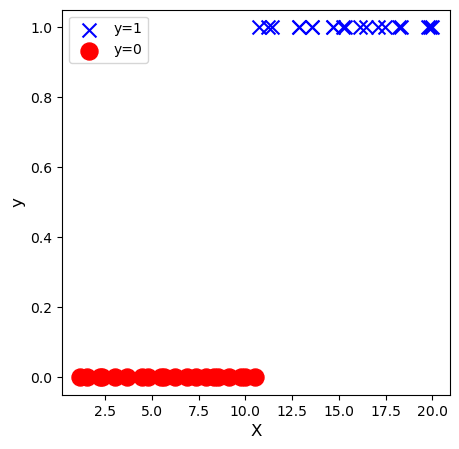

In [107]:
pos = y == 1
neg = y == 0
fig , ax = plt.subplots(1,1, figsize = (5,5))
ax.scatter(X[pos] ,y[pos] , c = 'b' , marker = 'x' , s = 100 ,label = 'y=1')
ax.scatter(X[neg] ,y[neg], c = 'r'  , marker  = 'o' , s = 150 , label = 'y=0')
ax.set_ylabel('y' , fontsize = 12)
ax.set_xlabel('X' , fontsize = 12)
ax.legend()

## Fit the Model

In [110]:
model = Sequential ([
               tf.keras.layers.Dense( 1 , input_dim = 1 , activation = 'sigmoid' , name = 'L1' )
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

In [112]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

### Predict the Value of X_test 

In [123]:
a1 = model.predict(X_test[7].reshape(1,1))
a1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.00014359]], dtype=float32)

In [130]:
X_test[7],y_test[7]

(array([7.89]), array([0]))